In [2]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO

### Préliminaires

#### Résolutions  théorique 

On veut résoudre théoriquement le problème d’optimisation non-linéaire ci-dessous :
$$
\inf_{(x_1,x_2)\in K} 𝑥_1^2 + 𝑥_2^2 -14x_1 - 6x_2 - 7
\text { avec }  K=\{(x_1,x_2) \in \mathbb{R}^2 \mid 𝑥_1  + 𝑥_2 \leq 2 \text{ et }  𝑥_1  + 2𝑥_2 \leq 3
$$


Notons 

$$ 
J(x) = 𝑥_1^2 + 𝑥_2^2 -14x_1 - 6x_2 - 7 \\
g_1(x) = 𝑥_1 + 𝑥_2 -2 \\
g_2(x) = 𝑥_1 + 2𝑥_2 -3 
$$

Montrons l'existence d'une solution $ (x_1 ,x_2)$ :

* $K$ est un ensemble fermé 
$$ 
K = g_1^{-1}(]-\infty, 0]) \cap g_2^{-1}(]-\infty, 0])
$$


$ g_1^{-1}(]-\infty, 0]) $ et $ g_2^{-1}(]-\infty, 0]) $ sont des fermés car l'image réciproque d'un fermé par une fonction continue est un fermé.
Comme l'intersection finie de deux fermés alors $K$ est un fermé. 
* $J$  est coercive :

D'après l'inégalité de cauchy-schwarz, on a 
$$
|14x_1 + 6x_2| \leq \|(14,6)\| \|(x_1,x_2)\|
$$

Puis on a
$$
J(x_1, x_2) \geq 𝑥_1^2 + 𝑥_2^2 - \|(14,6)\| \|(x_1,x_2)\| - 7
$$

Soit $\phi (t) = t^2 - \|(14,6)\| t - 7$ , alors $\underset {t \to \infty}{\phi (t) \to \infty}$ par croissance comparé

Comme $ J(x_1, x_2) \geq \phi (\|(x_1,x_2)\|) $, alors $\underset {\|(x_1,x_2)\| \to \infty}{J(x_1, x_2)\to \infty}$. Ainsi $J$ est coercive

Puisque $K$ est fermé et $J$  est coercive alors ce problème admet au moins une solution.



Cherchons une solution du problème :


Comme $g_1$  et $g_2$ sont des fonctions $ C^{\infty}$ ( car ceux sont des sommes de polynômes), les contraintes sont donc qualifiés. $J$ est différentiable car il est aussi $ C^{\infty}$.

Alors d'après le théorème de Karush-Kuhn-Tucker, il existe $\mu_1 \geq 0$ et $\mu_2 \geq 0$ tel que x un mininum du problème vérifie :


$$
\begin{cases}
   \nabla J(x) + \mu_1 \nabla g_1(x) + \mu_2 \nabla g_2(x) = 0 \\
    \mu_1 g_1(x) = 0  \\
    \mu_2 g_2(x) = 0\\
    g_1(x) \leq 0 \\
    g_2(x) \leq  0\\
\end{cases}
$$


D'une part on a 

$$
\nabla J
\begin{pmatrix}
2𝑥_1 - 14\\
2𝑥_2 - 6\\
\end{pmatrix} \\

\nabla g_1 =
\begin{pmatrix}
1\\
1\\
\end{pmatrix} \\

\nabla g_2 =
\begin{pmatrix}
1\\
2\\
\end{pmatrix}
$$


Ainsi on obtient ce système 

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
    \mu_1 ( x_1 + x_2 - 2 ) = 0  \\
    \mu_2 ( x_1 + 2x_2 - 3) = 0\\
\end{cases}
$$

On va raisonner par disjonction de cas suivant $\mu_1$ et $ \mu_2$ :

* Supposons $\mu_1 = 0$ et $\mu_2 = 0$

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
    \mu_1 ( x_1 + x_2 - 2 ) =0  \\
    \mu_2 ( x_1 + 2x_2 - 3) = 0\\
\end{cases}
$$

car $\mu_1 = 0$ et $\mu_2 = 0$
$\Leftrightarrow$

$$
\begin{cases}
   x_1 = \frac{14}{2} = 7   \\
   x_2 = \frac{6}{2} = 3 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
\end{cases}
$$


On a une contradiction la condition  $x_1 + x_2 \leq 2 $ fausse en prenant $x_1 =7$ et $x_2 = 3$. 

* Supposons $\mu_1 \neq 0$ et $\mu_2 = 0$

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
    \mu_1 ( x_1 + x_2 - 2 ) = 0  \\
    \mu_2 ( x_1 + 2x_2 - 3) = 0\\
\end{cases}
$$

car $\mu_1 \neq 0$ et $\mu_2 = 0$
$\Leftrightarrow$


$$
\begin{cases}
   2x_1 - 14 + \mu_1  = 0 \\
   2x_2 - 6 + \mu_1 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + x_2 - 2  = 0  \\
\end{cases}
$$


car $L_1 = L_1 - L_2$
$\Leftrightarrow$


$$
\begin{cases}
   2x_1 - 2x_2 - 8 = 0 \\
   2x_2 - 6 + \mu_1 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + x_2 - 2 = 0  \\
\end{cases}
$$


car réecriture de $L_1$ , $L_5$
$\Leftrightarrow$

$$
\begin{cases}
   x_1 - x_2 = 4  \\
   2x_2 - 6 + \mu_1 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + x_2 = 2   \\
\end{cases}
$$


car $L_1 = L_1 + L_5$ ,puis calcul de $L_5$
$\Leftrightarrow$

$$
\begin{cases}
   x_1 = \frac{6}{2} = 3 \\
   2x_2 - 6 + \mu_1 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_2 = -1  \\
\end{cases}
$$



car  puis calcul de $L_2$ 
$\Leftrightarrow$

$$
\begin{cases}
   x_1 = \frac{6}{2} = 3 \\
   \mu_1 = 2 + 6 = 8 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_2 = -1  \\
\end{cases}
$$


Conclusion on a une solution dans ce cas 

$$
\begin{cases}
   x_1 = 3 \\
   \mu_1 = 8 \\
   x_2 = -1  \\
   \mu_2 = 0 \\
\end{cases}
$$

* Supposons $\mu_1 = 0$ et $\mu_2 \neq 0$

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
    \mu_1 ( x_1 + x_2 - 2 ) = 0  \\
    \mu_2 ( x_1 + 2x_2 - 3) = 0\\
\end{cases}
$$

car $\mu_1 = 0$ 
$\Leftrightarrow$

$$
\begin{cases}
   2x_1 - 14  + \mu_2 = 0 \\
   2x_2 - 6 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   \mu_2 ( x_1 + 2x_2 - 3) = 0\\
\end{cases}
$$


car $( L_1 = 2L_1- L_2)$ et $\mu_2 \neq 0$
$\Leftrightarrow$

$$
\begin{cases}
   4x_1 - 2x_2  - 22  = 0 \\
   2x_2 - 6 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + 2x_2 - 3 = 0\\
\end{cases}
$$


car $( L_1 = L_1 + L_5) $
$\Leftrightarrow$

$$
\begin{cases}
   5x_1 - 25  = 0 \\
   2x_2 - 6 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + 2x_2 - 3 = 0\\
\end{cases}
$$




car (calcul dans  $L_1$ et  $L_5$) 
$\Leftrightarrow$

$$
\begin{cases}
   x_1 = 5 \\
   2x_2 - 6 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_2 = \frac{3 - 5}{2} = -1 \\
\end{cases}
$$

Ce qui est une contradiction car $x_1 + x_2 \leq 2 $ n'est plus vérifié avec $x_1 = 5$ et $ x_2 = -1$


* Supposons $\mu_1 \neq 0$ et $\mu_2 \neq 0$

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
    \mu_1 ( x_1 + x_2 - 2 ) = 0  \\
    \mu_2 ( x_1 + 2x_2 - 3) = 0\\
\end{cases}
$$

car $\mu_1 \neq 0$ et $\mu_2 \neq 0$
$\Leftrightarrow$

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + x_2 - 2  = 0  \\
   x_1 + 2x_2 - 3 = 0\\
\end{cases}
$$


car   $L_5 = L_5- L_4$
$\Leftrightarrow$

$$
\begin{cases}
   2x_1 - 14 + \mu_1 + \mu_2 = 0 \\
   2x_2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 + x_2  = 2  \\
   x_2 = 1 \\
\end{cases}
$$



car   calcul de $L_4$ et réécriture $L_1$ et $L_2$
$\Leftrightarrow$

$$
\begin{cases}
   2 - 14 + \mu_1 + \mu_2 = 0 \\
   2 - 6 + \mu_1 + 2\mu_2 = 0 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 = 1  \\
   x_2 = 1 \\
\end{cases}
$$


car  réécriture $L_1$ et $L_2$
$\Leftrightarrow$

$$
\begin{cases}
   \mu_1 + \mu_2 = 12 \\
   \mu_1 + 2\mu_2 = 4 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 = 1  \\
   x_2 = 1 \\
\end{cases}
$$


car  $L_2 = L_2 -L_1 $
$\Leftrightarrow$

$$
\begin{cases}
   \mu_1 + \mu_2 = 16 \\
   \mu_2 = _frac{4-12}{2} = -4 \\
   x_1 + x_2 \leq 2 \\
   x_1 + 2x_2 \leq 3 \\
   x_1 = 1  \\
   x_2 = 1 \\
\end{cases}
$$


$\mu_2 = -4 \leq 0 $  ce qui contredit l'hypothèse de départ ( $\mu_2 \geq 0 $) 

#### Résolutions numérique

In [13]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO

# Initialize Model
m = GEKKO(remote=True)

# #define parameter
# eq = m.Param(value=40)

# Variables
x1 = m.Var(value=2)
x2 = m.Var(value=0)

#Equations
m.Equation(x1 + x2 <= 2)
m.Equation(x1 + 2*x2 <= 3)

#Objective
m.Obj(x1**2 + x2**2 - 14*x1 - 6*x2 - 7)

#Set global options
m.options.IMODE = 3 #steady state optimization

#Solve simulation
m.solve(disp=True) # solve on public server

#Results
print('')
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))


apm 130.79.96.148_gk_model12 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              4
 Number of total equations: -            2
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

### Problèmes de contrôle optimal 

#### Contrôle d’un tram, 1ère version

On veut déterminer le contrôle $u$ et temps minimal $T$ nécessaire pour que la solution $(x, y)$ du système contrôlé:
$$
\begin{cases}
    x(t) = y(t) \text{  } t \in ]0, T[ \\
    y(t) = u(t) \text{  } t \in ]0, T[\\
    x(0) = y(0) = 0\\
\end{cases}
$$
satisfasse $x(T) = 0, y(T) = −1$, sous la contrainte $ |u(t)| \leq 1 $ p.p. $t \in ]0, T[$. 

Résolvons numériquement ce problème 

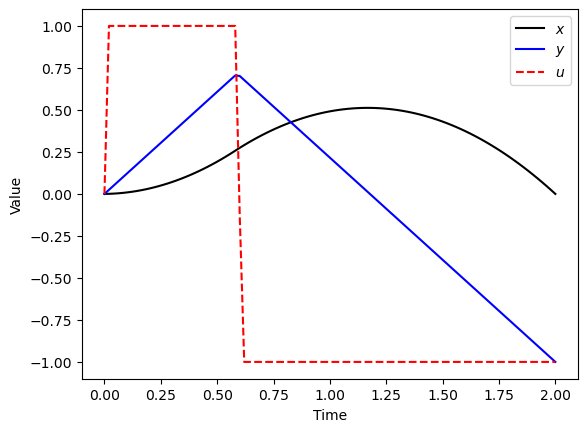

In [29]:
# Initialiser le modèle
m = GEKKO()

# Définir la discrétisation temporelle
nt = 101

# optimize final time
tf = m.FV(value=1,lb=0.01,ub=100.0)
tf.STATUS = 1

m.time = np.linspace(0, 2, nt)

# mark final time point
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Variables de contrôle
u = m.MV(lb=-1, ub=1)  # Contrôle u(t)
u.STATUS = 1  # Activer l'optimisation de cette variable

# Variables d'état
x = m.Var(value=0) # Condition initiale x(0) 
y = m.Var(value=0) # Condition initiale y(0)

# Équations 
m.Equation(x.dt() == y*tf)  # x˙(t) = y(t)
m.Equation(y.dt() == u*tf)  # y˙(t) = u(t)

m.Equation(x*final == 0)  # on veut x(T) = 0
m.Equation((y+1)*final == 0)   # on veut y(T) = -1


# Fonction objectif : minimiser le temps final
m.Obj(tf)

# Résoudre le problème d'optimisation
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False)

# Afficher les résultats
plt.figure(1) 
# plt.plot(m.time,tf.value,'g-',label=r'$tf$')
plt.plot(m.time,x.value,'k-',label=r'$x$')
plt.plot(m.time,y.value,'b-',label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Contrôle d’un tram, 2ème version

Dans cette partie, on cherche à minimiser une combinaison convexe du temps final avec $\frac{1}{2} \int_{0}^{T}  ( \dot{x}(t)^2 +  x(t)^2) dt $. Et on veut  avoir $x(T) = 0$ et $y(T) \in[−1−\epsilon, −1+ \epsilon]$ où $\epsilon > 0$ est un paramètre fixé par l’utilisateur.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO


# Initialiser le modèle
m = GEKKO()

# Paramètre epsilon fixé par l'utilisateur
epsilon = 0.1 

# Définir la discrétisation temporelle
nt = 101

# optimize final time
tf = m.FV(value=1,lb=0.01,ub=100.0)
tf.STATUS = 1

m.time = np.linspace(0, 2, nt)

# mark final time point
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Variables de contrôle
u = m.MV(lb=-1, ub=1)  # Contrôle u(t)
u.STATUS = 1  # Activer l'optimisation de cette variable

# Variables d'état
x = m.Var(value=0) # Condition initiale x(0) 
y = m.Var(value=0) # Condition initiale y(0)
z = m.Var(value=0) # Condition initiale z(0) = 0


# Équations 
m.Equation(x.dt() == y*tf)  # x˙(t) = y(t)
m.Equation(y.dt() == u*tf)  # y˙(t) = u(t)
m.Equation(z.dt() == 0.5*(y**2 + x**2))  # z˙(t) = 0.5*( y(t)^2 + x(t)^2 )


m.Equation(x*final == 0)  # on veut x(T) = 0
m.Equation((y+1-epsilon)*final <= 0)   # on veut -1-epsilon <= y(T) <= -1 + epsilon
m.Equation( (y+1+epsilon)*final >= 0)   # on veut -1-epsilon <= y(T) <= -1 + epsilon


# Fonction objectif : minimiser le temps final et l'intégrale de 0.5*(y^2 + x^2)
alpha = 0.5
m.Obj(alpha*tf + (1-alpha)*z*final)


# Résoudre le problème d'optimisation
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False)

# Afficher les résultats
plt.figure(1) 
# plt.plot(m.time,tf.value,'g-',label=r'$tf$')
plt.plot(m.time,x.value,'k-',label=r'$x$')
plt.plot(m.time,y.value,'b-',label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Contrôle d’insectes

##### Introduction 

Pour traiter une population $x(0)$ d’insectes nuisibles, on introduit dans
l’écosystème une population $y(0)$ d’insectes prédateurs (non nuisibles), se nourrissant des nuisibles. On suppose que les prédateurs que l’on introduit se reproduisent, de manière proportionnelle au nombre de nuisibles. Le contrôle $u(·)$ est le taux de disparition des prédateurs. Pour simplifier l’écriture on normalise les variables de façon à ce qu’aucune constante biologique n’intervienne dans l’écriture du système. Le modèle s’écrit alors


$$
\begin{cases}
    \dot{x}(t) = x(t)(1 - y(t)) \text{  } t \in ]0, T[ \\
    \dot{y}(t) = -y(t)(u(t) - x(t)) \text{  } t \in ]0, T[ \\
    x(0) = 1 \text{ , } y(0) = 4\\
\end{cases}
$$
où le contrôle $u(t)$ vérifie la contrainte ponctuelle :  $0 < 1 \leq u(t) \leq 3 \text { p.p. } t \in [0, T].$ 

##### Analyse du système

Question 1

Démontrons que, pour tout contrôle $u \text{ , } x(t) > 0 \text { et } y(t) > 0 \text{ sur } [0, T] $

* Montrons que $x(t) > 0 \text{  ,  } \forall t \in [ 0,T] $

L'équation à résoudre est de la forme 
$$ \dot{x(t)} = a(t)x(t) \text{ avec } a(t) = 1 - y(t)$$

C'est une équation linéaire et sa solution est donnée

$$x(t) = C\exp{A(t)} \text{  ,  } \forall t \in [ 0,T] $$

avec $C$ une constante et $A$ une primitive de $a$.

On remarque que pour tout $t$ $x(t)$ est soit positif ou  soit négatif en fonction de $C$. Or $x(0) = 1 > 0$. Ainsi $ x(t) \geq 0 $  sur $ [ 0,T] $.

* Montrons que $y(t) > 0 \text{  ,  } \forall t \in [ 0,T] $

Par le même raisonnement analogue en prenant $ a(t) = x(t) - u(t) \text{  } y(t) \geq 0 $  sur $ [ 0,T] $ .

Question 2

Dans le cadran $x > 0 \text{ , } y > 0$ , on cherche un point d'équilibre  $(x_e,y_e,u_e)$ tel que :

$$
\begin{cases}
    \dot{x_e}(t) = 0 \\
    \dot{y_e}(t) = 0  \\
\end{cases}
\Leftrightarrow

\begin{cases}
    x_e(t)(1 - y_e(t)) = 0 \\
    -y_e(t)(u_e(t) - x_e(t)) = 0  \\
\end{cases}
$$

Sur la première équation $ x_e(t)(1 - y_e(t)) = 0$, soit on a $x_e(t) = 0$ ou bien $(1 - y_e(t)) = 0$. Or on est dans le cadran $x > 0$ alors $x_e(t) = 0$ n'est pas une solution. Il reste $y_e(t) = 1$. Avec la deuxième équation $-y_e(t)(u_e(t) - x_e(t)) = 0$ et $y_e(t) = 1$, 
on obtient $u_e(t) = x_e(t)$.

Au final, les points d'équilibre sont $x_e = u_e$ ,$ y_e = 1$ pour tout $ 1 \leq u_e \leq 3 $ . On a un segment de points d'équilibres sur ce cadran.  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


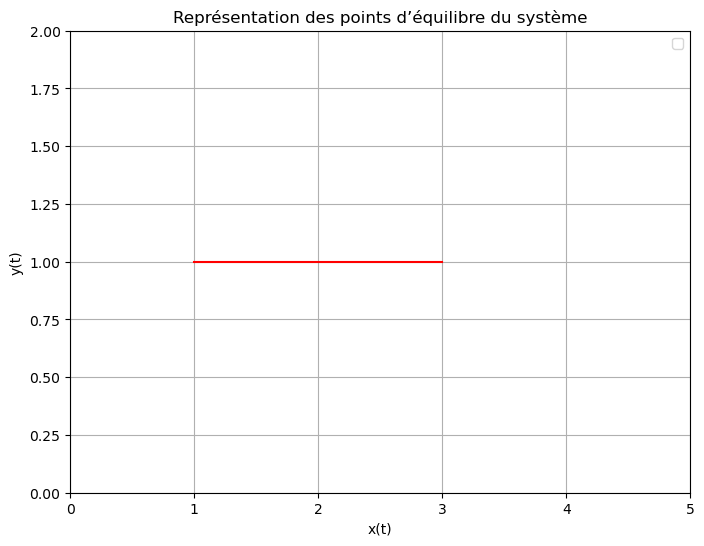

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# definition de x_e et y_e
x_e = np.linspace(1, 3, 1000)  
y_e = np.where((x_e >= 1) & (x_e <= 3), 1, 0)

# Tracons le segment
plt.figure(figsize=(8, 6))
plt.plot(x_e, y_e, color='red')
# plt.plot(x_e, y_e, label='y_e = 1 et 1 <= x_e <= 3', color='red')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Représentation des points d’équilibre du système')
plt.xlim(0, 5) 
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


Question 3

Traçons le portrait de phase de ce système (champ de vecteurs et trajectoires) en l’absence de contrôle $(u(·) = 0)$ et pour le choix de contrôle $u(·) = 2$

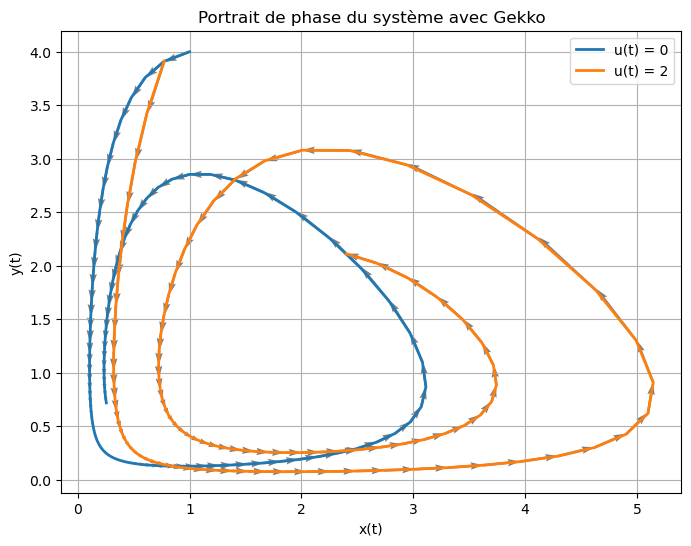

In [11]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Temps final
T = 10

# Création du modèle
m = GEKKO(remote=False)

# Paramètres
u = m.MV(value=0, lb=1, ub=3)  # Contrôle u(t)

# Variables d'état
x = m.Var(value=1)  # x(0) = 1
y = m.Var(value=4)  # y(0) = 4

# Équations différentielles
m.Equation(x.dt() == x * (1 - y))
m.Equation(y.dt() == -y * (u - x))

# Configuration de l'horizon temporel
m.time = np.linspace(0, T, 100)

# Résolution de l'optimisation dynamique pour u = 0
u.VALUE = 0
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False)
x_values_0 = np.array(x.VALUE)
y_values_0 = np.array(y.VALUE)

# Résolution de l'optimisation dynamique pour u = 2
u.VALUE = 2
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False)
x_values_2 = np.array(x.VALUE)
y_values_2 = np.array(y.VALUE)

# Tracé du portrait de phase
plt.figure(figsize=(8, 6))

# Tracé du champ de vecteurs
plt.quiver(x_values_0[:-1], y_values_0[:-1], x_values_0[1:]-x_values_0[:-1], y_values_0[1:]-y_values_0[:-1], scale_units='xy', scale=1, color='gray', width=0.004)
plt.quiver(x_values_2[:-1], y_values_2[:-1], x_values_2[1:]-x_values_2[:-1], y_values_2[1:]-y_values_2[:-1], scale_units='xy', scale=1, color='gray', width=0.004)

# Tracé des trajectoires
plt.plot(x_values_0, y_values_0, label='u(t) = 0', linewidth=2)
plt.plot(x_values_2, y_values_2, label='u(t) = 2', linewidth=2)

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Portrait de phase du système avec Gekko')
plt.grid(True)
plt.legend()
plt.show()


##### Contrôle optimal du système

Partie 1

On veut résoudre numériquement le problème de contrôle optimal suivant :

$$
\inf_{u} \{ \text {  } T \text{  } | \text{  } x(T) = a,\text{  } y(T) = 1 \}
$$

$\text { avec }  a \in [1,3] \text { est donné } $

Traçons la fonction de contrôle obtenue et la trajectoire optimale associée

Final Time: 3.3881641044


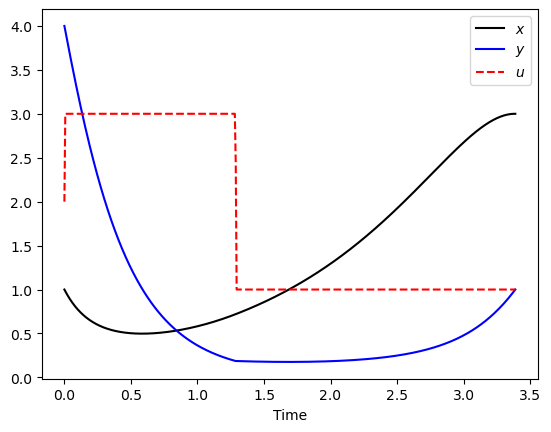

In [6]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO

m = GEKKO() # initialize GEKKO
nt = 501
m.time = np.linspace(0,1,nt)

# paramètre a 
a = m.Param(value=3) #   1 <= a <= 3  (a = 1 problème !!!)

# Variables
x = m.Var(value=1.0)
y = m.Var(value=4.0)
p = np.zeros(nt) # final time = 1

p[-1] = 1.0
final = m.Param(value=p)

# optimize final time
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

# control changes every time period
u = m.MV(value=2,lb=1,ub=3)
u.STATUS = 1


m.Equation(x.dt()==x*(1-y)*tf) # x˙(t) = x(t)( 1-y(t))
m.Equation(y.dt()== -y*(u-x)*tf) # y˙(t) = -y(t)(u(t) - x(t))


m.Equation((x-a)*final==0) # on veut x(T) = a
m.Equation((y-1)*final == 0) # on veut y(T) = 1


m.Obj(tf)
m.options.IMODE = 6
m.solve(disp=False)
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x$')
plt.plot(tm,y.value,'b-',label=r'$y$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()

Partie 2
On résout le même problème en rajoutant le coût $L^{2}$ du
contrôle $\int_{0}^{T} u(t)^{2}dt$ 

Final Time: 3.6008104133


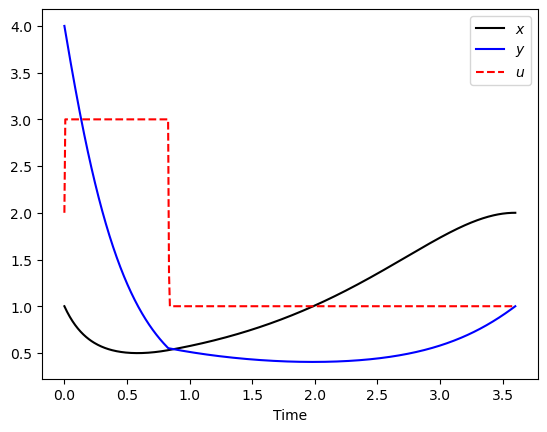

In [15]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO

m = GEKKO() # initialize GEKKO
nt = 501
m.time = np.linspace(0,1,nt)

# paramètre a 
a = m.Param(value=2,lb=1,ub=3) #   1 <= a <= 3  (a = 1 problème !!!)

# Variables
x = m.Var(value=1.0)
y = m.Var(value=4.0)
z = m.Var(value=0.0) 

p = np.zeros(nt) # final time = 1

p[-1] = 1.0
final = m.Param(value=p)

# optimize final time
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

# control changes every time period
u = m.MV(value=2,lb=1,ub=3)
u.STATUS = 1


m.Equation(x.dt()==x*(1-y)*tf) # x˙(t) = x(t)( 1-y(t))
m.Equation(y.dt()== -y*(u-x)*tf) # y˙(t) = -y(t)(u(t) - x(t))
m.Equation(z.dt() == u**2) # z˙(t) = u(t)^2 


m.Equation((x-a)*final==0) # on veut x(T) = a
m.Equation((y-1)*final == 0) # on veut y(T) = 1


# Fonction objectif : minimiser le temps final et l'intégrale de u^2
alpha = 0.5
m.Obj(alpha*tf + (1-alpha)*z*final)

m.options.IMODE = 6 # optimal control mode
m.solve(disp=False)


# Afficher les résultats
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x$')
plt.plot(tm,y.value,'b-',label=r'$y$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()